# Run Consistory Batch

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.86it/s]
/home/hyeonseok/.conda/envs/consistory/lib/python3.10/site-packages/torch/cuda/memory.py:329: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


[(1, 50)]


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


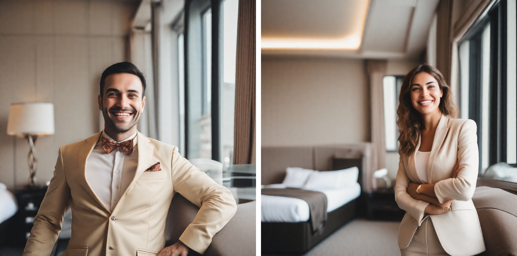

Saved image: /home/hyeonseok/insta/generated_images/image_0.png
Saved image: /home/hyeonseok/insta/generated_images/image_1.png
Maximum GPU memory used: 14.07 GB


In [2]:
# Copyright (C) 2024 NVIDIA Corporation.  All rights reserved.
#
# This work is licensed under the LICENSE file
# located at the root directory.

import torch
import gc
from consistory_run import load_pipeline, run_batch_generation
import os

gpu = 0
story_pipeline = load_pipeline(gpu)

style = "A photo of "
subject = "a luxary hotel"
concept_token = ['hotel']
settings = ["a smiling man",
            "a smiling woman"]

seed = 40
mask_dropout = 0.5
same_latent = False
n_achors = 2

prompts = [f'{style}{subject} {setting}' for setting in settings]

# Reset the GPU memory tracking
torch.cuda.reset_max_memory_allocated(gpu)

images, image_all = run_batch_generation(story_pipeline, prompts, concept_token, seed, mask_dropout=mask_dropout, same_latent=same_latent, n_achors = 2)
display(image_all)

generated_images_dir = '/home/hyeonseok/MLLM-BIAS/generated_images'
os.makedirs(generated_images_dir, exist_ok=True)

for i, image in enumerate(images):
    image_path = os.path.join(generated_images_dir, f'image_{i}.png')
    image.save(image_path)
    print(f"Saved image: {image_path}")


# Report maximum GPU memory usage in GB
max_memory_used = torch.cuda.max_memory_allocated(gpu) / (1024**3)  # Convert to GB
print(f"Maximum GPU memory used: {max_memory_used:.2f} GB")

# Run Consistory w/ Cached Anchors

/home/hyeonseok/.conda/envs/consistory/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]
/home/hyeonseok/.conda/envs/consistory/lib/python3.10/site-packages/torch/cuda/memory.py:329: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


[(1, 50)]


  0%|          | 0/50 [00:00<?, ?it/s]/home/hyeonseok/.conda/envs/consistory/lib/python3.10/site-packages/diffusers/utils/torch_utils.py:106: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392067780/work/aten/src/ATen/EmptyTensor.cpp:31.)
  x_freq = fftn(x, dim=(-2, -1))
100%|██████████| 50/50 [00:23<00:00,  2.11it/s]


Anchor images:


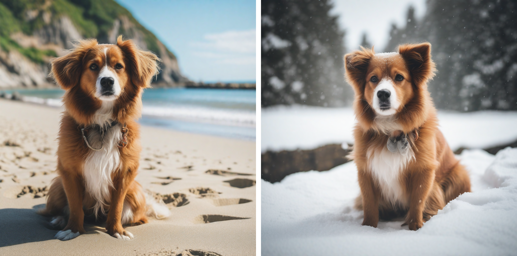

[(1, 50)]


100%|██████████| 50/50 [00:11<00:00,  4.22it/s]


Extra prompt: A photo of a cute dog playing in the park


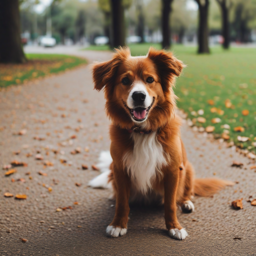

[(1, 50)]


100%|██████████| 50/50 [00:11<00:00,  4.20it/s]


Extra prompt: A photo of a cute dog surfing in the ocean


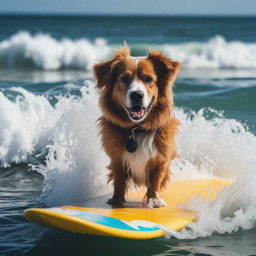

Maximum GPU memory used: 20.97 GB


In [1]:
import torch
import gc
from consistory_run import load_pipeline, run_anchor_generation, run_extra_generation

gpu = 0
story_pipeline = load_pipeline(gpu)

style = "A photo of "
subject = "a cute dog"
concept_token = ['dog']
anchor_settings = ["sitting in the beach", "standing in the snow"]
extra_settings = ["playing in the park", "surfing in the ocean"]

seed = 40
mask_dropout = 0.5
same_latent = False

anchor_prompts = [f'{style}{subject} {setting}' for setting in anchor_settings]
extra_prompts = [f'{style}{subject} {setting}' for setting in extra_settings]

# Reset the GPU memory tracking
torch.cuda.reset_max_memory_allocated(gpu)

anchor_out_images, anchor_image_all, anchor_cache_first_stage, anchor_cache_second_stage = run_anchor_generation(story_pipeline, anchor_prompts, concept_token, 
                                                                                                       seed=seed, mask_dropout=mask_dropout, same_latent=same_latent,
                                                                                                       cache_cpu_offloading=True)

print('Anchor images:')
display(anchor_image_all)

for extra_prompt in extra_prompts:
    extra_out_images, extra_image_all = run_extra_generation(story_pipeline, [extra_prompt], concept_token, anchor_cache_first_stage, anchor_cache_second_stage, 
                                                seed=seed, mask_dropout=mask_dropout, same_latent=same_latent, cache_cpu_offloading=True)
    
    print(f'Extra prompt: {extra_prompt}')
    display(extra_image_all)

# Report maximum GPU memory usage in GB
max_memory_used = torch.cuda.max_memory_allocated(gpu) / (1024**3)  # Convert to GB
print(f"Maximum GPU memory used: {max_memory_used:.2f} GB")